In [1]:
from sai.stats.features import *

In [2]:
import allel
import os

In [3]:
import scipy
import yaml
import numpy as np
from typing import Any
from sai.stats.features import *

from sai.utils import parse_ind_file
from sai.utils.preprocessors import DataPreprocessor
from sai.stats.features import *

import os
import pandas as pd
from multiprocessing import Lock
from sai.utils.multiprocessing import mp_manager
from sai.utils.generators import WindowDataGenerator
from sai.utils.generators import SaiWindowDataGenerator

from sai.utils.generators import WindowGenerator

from sai.preprocess import Sai_lr_preprocess
from sai.preprocess import Sai_lr_process_folder

import sai.utils.gaia_utils

In [4]:
features_yaml = "SaiFeatureSelection2.yaml"


In [5]:
vcf_chr9 = os.path.join("examples", "data", "1KG.nea_den.chr9.example.vcf.gz")

In [6]:
ref_ind_file = os.path.join("examples", "data", "1KG.ref.samples.txt")
tgt_ind_file = os.path.join("examples", "data", "1KG.tgt.samples.txt")
src_ind_file = os.path.join("examples", "data", "1KG.src.samples.txt")

In [7]:
vcf_file_allel = allel.read_vcf(vcf_chr9)

In [8]:
vcf_file_allel["samples"]

array(['HG02461', 'HG02462', 'HG02464', ..., 'NA20832', 'AltaiNeandertal',
       'Denisova'], dtype=object)

In [9]:
genotypes = vcf_file_allel['calldata/GT']
genotype_array = allel.GenotypeArray(genotypes)

is_phased = genotype_array.is_phased

In [10]:
genotype_array

<GenotypeArray shape=(12777, 1513, 2) dtype=int8>
0/0 0/0 0/0 0/0 0/1 ... 0/0 0/0 0/0 0/0 0/0
0/0 0/0 0/0 0/0 0/0 ... 0/0 0/0 0/0 0/0 0/0
0/0 0/0 0/0 0/0 0/0 ... 0/0 0/0 0/0 0/0 0/0
...
0/0 0/0 0/0 0/0 0/0 ... 0/0 0/0 0/0 0/0 0/0
0/0 0/0 0/0 0/0 0/0 ... 0/0 0/0 0/0 0/0 0/0
0/0 0/0 0/0 0/0 0/0 ... 0/0 0/0 0/0 0/0 0/0

In [11]:
len(vcf_file_allel["samples"])

1513

In [12]:
import pandas as pd
pd.read_csv(os.path.join("examples", "data", "1KG.ref.samples.txt"), sep="\t", header=None)

0        1
0     AFR+EAS  HG02461
1     AFR+EAS  HG02462
2     AFR+EAS  HG02464
3     AFR+EAS  HG02465
4     AFR+EAS  HG02561
...       ...      ...
1003  AFR+EAS  NA19087
1004  AFR+EAS  NA19088
1005  AFR+EAS  NA19089
1006  AFR+EAS  NA19090
1007  AFR+EAS  NA19091

[1008 rows x 2 columns]

In [13]:
chr_name = "9"
win_len = 50000
win_step = 10000
feature_config = features_yaml
output_dir = "newpreprdir2"
vcf_file = vcf_chr9

In [14]:
res = Sai_lr_preprocess(    vcf_file,
    chr_name,
    ref_ind_file,
    tgt_ind_file,
    win_len,
    win_step,
    feature_config,
    output_dir,
    src_ind_file=src_ind_file)

In [15]:
res

Chromosome     Start       End  \
0           9  16360000  16410000   
1           9  16370000  16420000   
2           9  16380000  16430000   
3           9  16390000  16440000   
4           9  16400000  16450000   
5           9  16410000  16460000   
6           9  16420000  16470000   
7           9  16430000  16480000   
8           9  16440000  16490000   
9           9  16450000  16500000   
10          9  16460000  16510000   
11          9  16470000  16520000   
12          9  16480000  16530000   
13          9  16490000  16540000   
14          9  16500000  16550000   
15          9  16510000  16560000   
16          9  16520000  16570000   
17          9  16530000  16580000   
18          9  16540000  16590000   
19          9  16550000  16600000   
20          9  16560000  16610000   
21          9  16570000  16620000   
22          9  16580000  16630000   
23          9  16590000  16640000   
24          9  16600000  16650000   
25          9  16610000  16660000   
26          9  16620000  16670000   
27          9  16630000  16680000   
28          9  16640000  16690000   
29          9  16650000  16700000   
30          9  16660000  16710000   
31          9  16670000  16720000   
32          9  16680000  16730000   
33          9  16690000  16740000   
34          9  16700000  16750000   
35          9  16710000  16760000   
36          9  16720000  16770000   
37          9  16730000  16780000   
38          9  16740000  16790000   
39          9  16750000  16800000   
40          9  16760000  16810000   
41          9  16770000  16820000   
42          9  16780000  16830000   
43          9  16790000  16840000   
44          9  16800000  16850000   
45          9  16810000  16860000   
46          9  16820000  16870000   
47          9  16830000  16880000   
48          9  16840000  16890000   
49          9  16850000  16900000   
50          9  16860000  16910000   
51          9  16870000  16920000   
52          9  16880000  16930000   
53          9  16890000  16940000   

                                              Samples  theta_pi_v2|True  \
0   {'Ref': ['HG02461', 'HG02462', 'HG02464', 'HG0...          3.616950   
1   {'Ref': ['HG02461', 'HG02462', 'HG02464', 'HG0...          6.398744   
2   {'Ref': ['HG02461', 'HG02462', 'HG02464', 'HG0...          9.082022   
3   {'Ref': ['HG02461', 'HG02462', 'HG02464', 'HG0...         11.822274   
4   {'Ref': ['HG02461', 'HG02462', 'HG02464', 'HG0...         15.040851   
5   {'Ref': ['HG02461', 'HG02462', 'HG02464', 'HG0...         16.910356   
6   {'Ref': ['HG02461', 'HG02462', 'HG02464', 'HG0...         17.436882   
7   {'Ref': ['HG02461', 'HG02462', 'HG02464', 'HG0...         17.295192   
8   {'Ref': ['HG02461', 'HG02462', 'HG02464', 'HG0...         16.348847   
9   {'Ref': ['HG02461', 'HG02462', 'HG02464', 'HG0...         15.561744   
10  {'Ref': ['HG02461', 'HG02462', 'HG02464', 'HG0...         13.184122   
11  {'Ref': ['HG02461', 'HG02462', 'HG02464', 'HG0...         13.971225   
12  {'Ref': ['HG02461', 'HG02462', 'HG02464', 'HG0...         14.047309   
13  {'Ref': ['HG02461', 'HG02462', 'HG02464', 'HG0...         13.591909   
14  {'Ref': ['HG02461', 'HG02462', 'HG02464', 'HG0...         14.148201   
15  {'Ref': ['HG02461', 'HG02462', 'HG02464', 'HG0...         14.245910   
16  {'Ref': ['HG02461', 'HG02462', 'HG02464', 'HG0...         11.545729   
17  {'Ref': ['HG02461', 'HG02462', 'HG02464', 'HG0...         11.386189   
18  {'Ref': ['HG02461', 'HG02462', 'HG02464', 'HG0...         13.828640   
19  {'Ref': ['HG02461', 'HG02462', 'HG02464', 'HG0...         13.010174   
20  {'Ref': ['HG02461', 'HG02462', 'HG02464', 'HG0...         11.678641   
21  {'Ref': ['HG02461', 'HG02462', 'HG02464', 'HG0...         23.550381   
22  {'Ref': ['HG02461', 'HG02462', 'HG02464', 'HG0...         24.142145   
23  {'Ref': ['HG02461', 'HG02462', 'HG02464', 'HG0...         22.487676   
24  {'Ref': ['HG02461', 'HG02462', 'HG02464', 'HG0...         23.118264   
25  {'Ref': ['HG0

In [16]:
import os
import pandas as pd
from sai.utils.preprocessors import SaiFeatureVectorsPreprocessor
from sai.utils.preprocessors import SaiLRPreprocessor

### several variants to call the feature processing

In [17]:
preprocessor = SaiLRPreprocessor(
    chr_name=chr_name,
    ref_ind_file=ref_ind_file,
    tgt_ind_file=tgt_ind_file,
    src_ind_file=src_ind_file,
    win_len=win_len,
    win_step=win_step,
    feature_config=feature_config,
    output_dir="gaia_sai_feature_test/",
    nprocess=4,
    is_phased=False
)
result_df_unphased = preprocessor.run(vcf_file=vcf_file)

/home/jalh/Desktop/sai_sim/sai/stats/features.py:1193: RuntimeWarning: invalid value encountered in sqrt
  r_value = D / (np.sqrt(pA * (1 - pA) * pB * (1 - pB)))
/home/jalh/Desktop/sai_sim/sai/stats/features.py:1193: RuntimeWarning: invalid value encountered in sqrt
  r_value = D / (np.sqrt(pA * (1 - pA) * pB * (1 - pB)))
/home/jalh/Desktop/sai_sim/sai/stats/features.py:1193: RuntimeWarning: invalid value encountered in sqrt
  r_value = D / (np.sqrt(pA * (1 - pA) * pB * (1 - pB)))
/home/jalh/Desktop/sai_sim/sai/stats/features.py:1193: RuntimeWarning: invalid value encountered in sqrt
  r_value = D / (np.sqrt(pA * (1 - pA) * pB * (1 - pB)))


In [18]:
preprocessor = SaiLRPreprocessor(
    chr_name=chr_name,
    ref_ind_file=ref_ind_file,
    tgt_ind_file=tgt_ind_file,
    src_ind_file=src_ind_file,
    win_len=win_len,
    win_step=win_step,
    feature_config=feature_config,
    output_dir="gaia_sai_feature_test/",
    nprocess=4,
    is_phased=True
)
result_df_phased = preprocessor.run(vcf_file=vcf_file)

In [20]:
result_df_phased

Chromosome     Start       End  \
0           9  16360000  16410000   
1           9  16370000  16420000   
2           9  16380000  16430000   
3           9  16390000  16440000   
4           9  16400000  16450000   
5           9  16410000  16460000   
6           9  16420000  16470000   
7           9  16430000  16480000   
8           9  16440000  16490000   
9           9  16450000  16500000   
10          9  16460000  16510000   
11          9  16470000  16520000   
12          9  16480000  16530000   
13          9  16490000  16540000   
14          9  16500000  16550000   
15          9  16510000  16560000   
16          9  16520000  16570000   
17          9  16530000  16580000   
18          9  16540000  16590000   
19          9  16550000  16600000   
20          9  16560000  16610000   
21          9  16570000  16620000   
22          9  16580000  16630000   
23          9  16590000  16640000   
24          9  16600000  16650000   
25          9  16610000  16660000   
26          9  16620000  16670000   
27          9  16630000  16680000   
28          9  16640000  16690000   
29          9  16650000  16700000   
30          9  16660000  16710000   
31          9  16670000  16720000   
32          9  16680000  16730000   
33          9  16690000  16740000   
34          9  16700000  16750000   
35          9  16710000  16760000   
36          9  16720000  16770000   
37          9  16730000  16780000   
38          9  16740000  16790000   
39          9  16750000  16800000   
40          9  16760000  16810000   
41          9  16770000  16820000   
42          9  16780000  16830000   
43          9  16790000  16840000   
44          9  16800000  16850000   
45          9  16810000  16860000   
46          9  16820000  16870000   
47          9  16830000  16880000   
48          9  16840000  16890000   
49          9  16850000  16900000   
50          9  16860000  16910000   
51          9  16870000  16920000   
52          9  16880000  16930000   
53          9  16890000  16940000   

                                              Samples  theta_pi_v2|True  \
0   {'Ref': ['HG02461', 'HG02462', 'HG02464', 'HG0...          3.616950   
1   {'Ref': ['HG02461', 'HG02462', 'HG02464', 'HG0...          6.398744   
2   {'Ref': ['HG02461', 'HG02462', 'HG02464', 'HG0...          9.082022   
3   {'Ref': ['HG02461', 'HG02462', 'HG02464', 'HG0...         11.822274   
4   {'Ref': ['HG02461', 'HG02462', 'HG02464', 'HG0...         15.040851   
5   {'Ref': ['HG02461', 'HG02462', 'HG02464', 'HG0...         16.910356   
6   {'Ref': ['HG02461', 'HG02462', 'HG02464', 'HG0...         17.436882   
7   {'Ref': ['HG02461', 'HG02462', 'HG02464', 'HG0...         17.295192   
8   {'Ref': ['HG02461', 'HG02462', 'HG02464', 'HG0...         16.348847   
9   {'Ref': ['HG02461', 'HG02462', 'HG02464', 'HG0...         15.561744   
10  {'Ref': ['HG02461', 'HG02462', 'HG02464', 'HG0...         13.184122   
11  {'Ref': ['HG02461', 'HG02462', 'HG02464', 'HG0...         13.971225   
12  {'Ref': ['HG02461', 'HG02462', 'HG02464', 'HG0...         14.047309   
13  {'Ref': ['HG02461', 'HG02462', 'HG02464', 'HG0...         13.591909   
14  {'Ref': ['HG02461', 'HG02462', 'HG02464', 'HG0...         14.148201   
15  {'Ref': ['HG02461', 'HG02462', 'HG02464', 'HG0...         14.245910   
16  {'Ref': ['HG02461', 'HG02462', 'HG02464', 'HG0...         11.545729   
17  {'Ref': ['HG02461', 'HG02462', 'HG02464', 'HG0...         11.386189   
18  {'Ref': ['HG02461', 'HG02462', 'HG02464', 'HG0...         13.828640   
19  {'Ref': ['HG02461', 'HG02462', 'HG02464', 'HG0...         13.010174   
20  {'Ref': ['HG02461', 'HG02462', 'HG02464', 'HG0...         11.678641   
21  {'Ref': ['HG02461', 'HG02462', 'HG02464', 'HG0...         23.550381   
22  {'Ref': ['HG02461', 'HG02462', 'HG02464', 'HG0...         24.142145   
23  {'Ref': ['HG02461', 'HG02462', 'HG02464', 'HG0...         22.487676   
24  {'Ref': ['HG02461', 'HG02462', 'HG02464', 'HG0...         23.118264   
25  {'Ref': ['HG0

In [21]:
vcf_location = os.path.join("examples", "data")

In [22]:
all_res = Sai_lr_process_folder(vcf_location, chr_name, ref_ind_file, tgt_ind_file, src_ind_file, win_len, win_step, feature_config, output_dir)

# visualization 

In [25]:
result_df = result_df_unphased

In [26]:
result_df["Introgression"] = 0
introgression_start = 16680001
introgression_end = 16840000
result_df.loc[(result_df['End'] >= introgression_start) & (result_df['Start'] <= introgression_end), 'Introgression'] = 1

In [27]:
result_df

Chromosome     Start       End  \
0           9  16360000  16410000   
1           9  16370000  16420000   
2           9  16380000  16430000   
3           9  16390000  16440000   
4           9  16400000  16450000   
5           9  16410000  16460000   
6           9  16420000  16470000   
7           9  16430000  16480000   
8           9  16440000  16490000   
9           9  16450000  16500000   
10          9  16460000  16510000   
11          9  16470000  16520000   
12          9  16480000  16530000   
13          9  16490000  16540000   
14          9  16500000  16550000   
15          9  16510000  16560000   
16          9  16520000  16570000   
17          9  16530000  16580000   
18          9  16540000  16590000   
19          9  16550000  16600000   
20          9  16560000  16610000   
21          9  16570000  16620000   
22          9  16580000  16630000   
23          9  16590000  16640000   
24          9  16600000  16650000   
25          9  16610000  16660000   
26          9  16620000  16670000   
27          9  16630000  16680000   
28          9  16640000  16690000   
29          9  16650000  16700000   
30          9  16660000  16710000   
31          9  16670000  16720000   
32          9  16680000  16730000   
33          9  16690000  16740000   
34          9  16700000  16750000   
35          9  16710000  16760000   
36          9  16720000  16770000   
37          9  16730000  16780000   
38          9  16740000  16790000   
39          9  16750000  16800000   
40          9  16760000  16810000   
41          9  16770000  16820000   
42          9  16780000  16830000   
43          9  16790000  16840000   
44          9  16800000  16850000   
45          9  16810000  16860000   
46          9  16820000  16870000   
47          9  16830000  16880000   
48          9  16840000  16890000   
49          9  16850000  16900000   
50          9  16860000  16910000   
51          9  16870000  16920000   
52          9  16880000  16930000   
53          9  16890000  16940000   

                                              Samples  theta_pi_v2|True  \
0   {'Ref': ['HG02461', 'HG02462', 'HG02464', 'HG0...          5.314800   
1   {'Ref': ['HG02461', 'HG02462', 'HG02464', 'HG0...          9.074378   
2   {'Ref': ['HG02461', 'HG02462', 'HG02464', 'HG0...         13.070540   
3   {'Ref': ['HG02461', 'HG02462', 'HG02464', 'HG0...         17.913619   
4   {'Ref': ['HG02461', 'HG02462', 'HG02464', 'HG0...         23.423188   
5   {'Ref': ['HG02461', 'HG02462', 'HG02464', 'HG0...         26.118857   
6   {'Ref': ['HG02461', 'HG02462', 'HG02464', 'HG0...         27.487701   
7   {'Ref': ['HG02461', 'HG02462', 'HG02464', 'HG0...         28.086828   
8   {'Ref': ['HG02461', 'HG02462', 'HG02464', 'HG0...         26.546330   
9   {'Ref': ['HG02461', 'HG02462', 'HG02464', 'HG0...         24.988394   
10  {'Ref': ['HG02461', 'HG02462', 'HG02464', 'HG0...         21.435360   
11  {'Ref': ['HG02461', 'HG02462', 'HG02464', 'HG0...         23.391310   
12  {'Ref': ['HG02461', 'HG02462', 'HG02464', 'HG0...         23.228136   
13  {'Ref': ['HG02461', 'HG02462', 'HG02464', 'HG0...         22.197670   
14  {'Ref': ['HG02461', 'HG02462', 'HG02464', 'HG0...         22.989118   
15  {'Ref': ['HG02461', 'HG02462', 'HG02464', 'HG0...         23.209005   
16  {'Ref': ['HG02461', 'HG02462', 'HG02464', 'HG0...         18.723306   
17  {'Ref': ['HG02461', 'HG02462', 'HG02464', 'HG0...         17.364430   
18  {'Ref': ['HG02461', 'HG02462', 'HG02464', 'HG0...         16.390835   
19  {'Ref': ['HG02461', 'HG02462', 'HG02464', 'HG0...         13.955145   
20  {'Ref': ['HG02461', 'HG02462', 'HG02464', 'HG0...         11.209446   
21  {'Ref': ['HG02461', 'HG02462', 'HG02464', 'HG0...         12.576750   
22  {'Ref': ['HG02461', 'HG02462', 'HG02464', 'HG0...         13.623588   
23  {'Ref': ['HG02461', 'HG02462', 'HG02464', 'HG0...         15.002419   
24  {'Ref': ['HG02461', 'HG02462', 'HG02464', 'HG0...         17.076277   
25  {'Ref': ['HG0

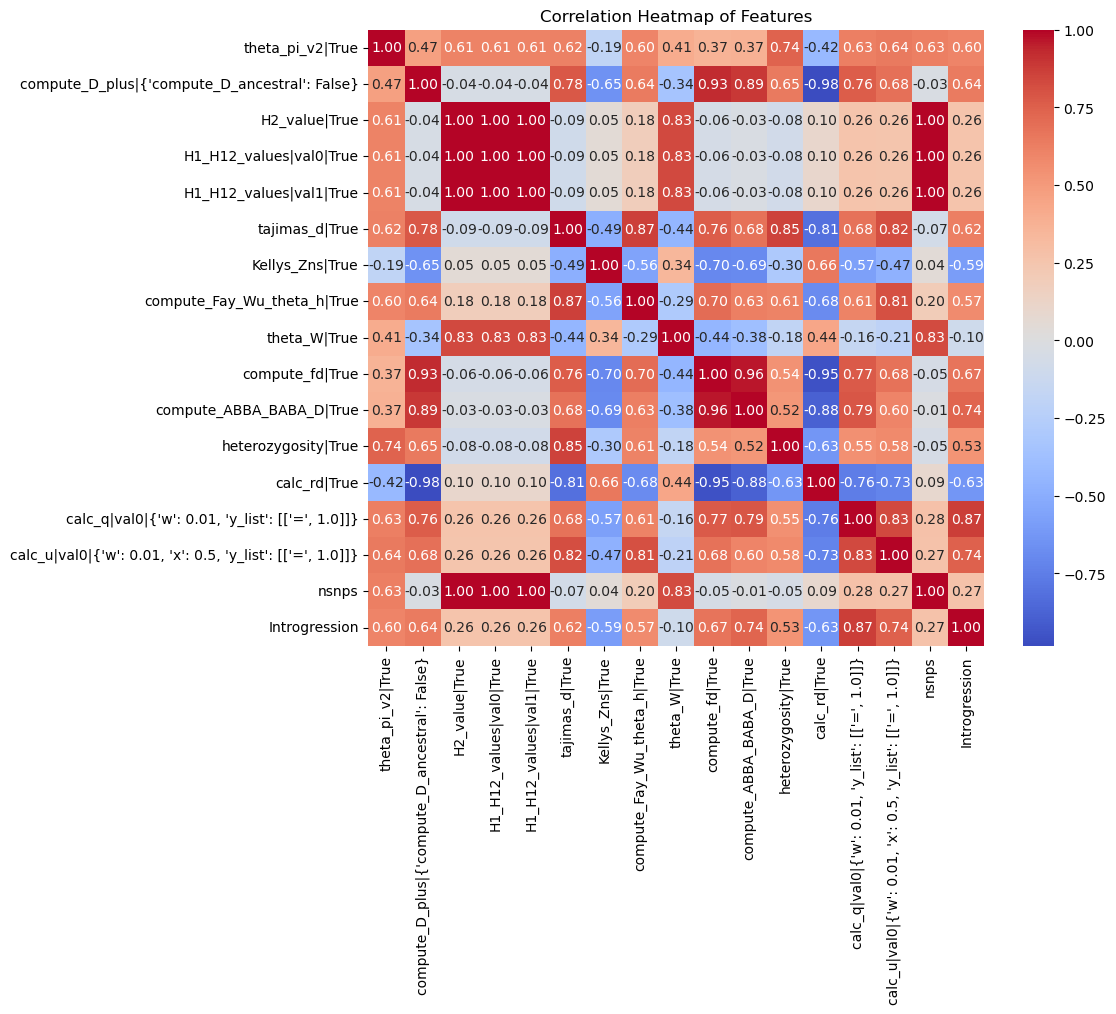

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt


filtered_df = result_df.drop(columns=[
    'Chromosome', 'Start', 'End', #'Introgression',
    'Samples', 'tgt_gts_shape', 'ref_gts_shape',
    'src_gts_shape', 'file'
])


numeric_df = filtered_df.apply(pd.to_numeric, errors='coerce')
property_columns = numeric_df.dropna(axis=1, how='all').columns

# correlation matrix
plt.figure(figsize=(10, 8))
#corr_matrix = result_df[property_columns].corr(method="spearman")
corr_matrix = result_df[property_columns].corr()

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title("Correlation Heatmap of Features")
plt.show()

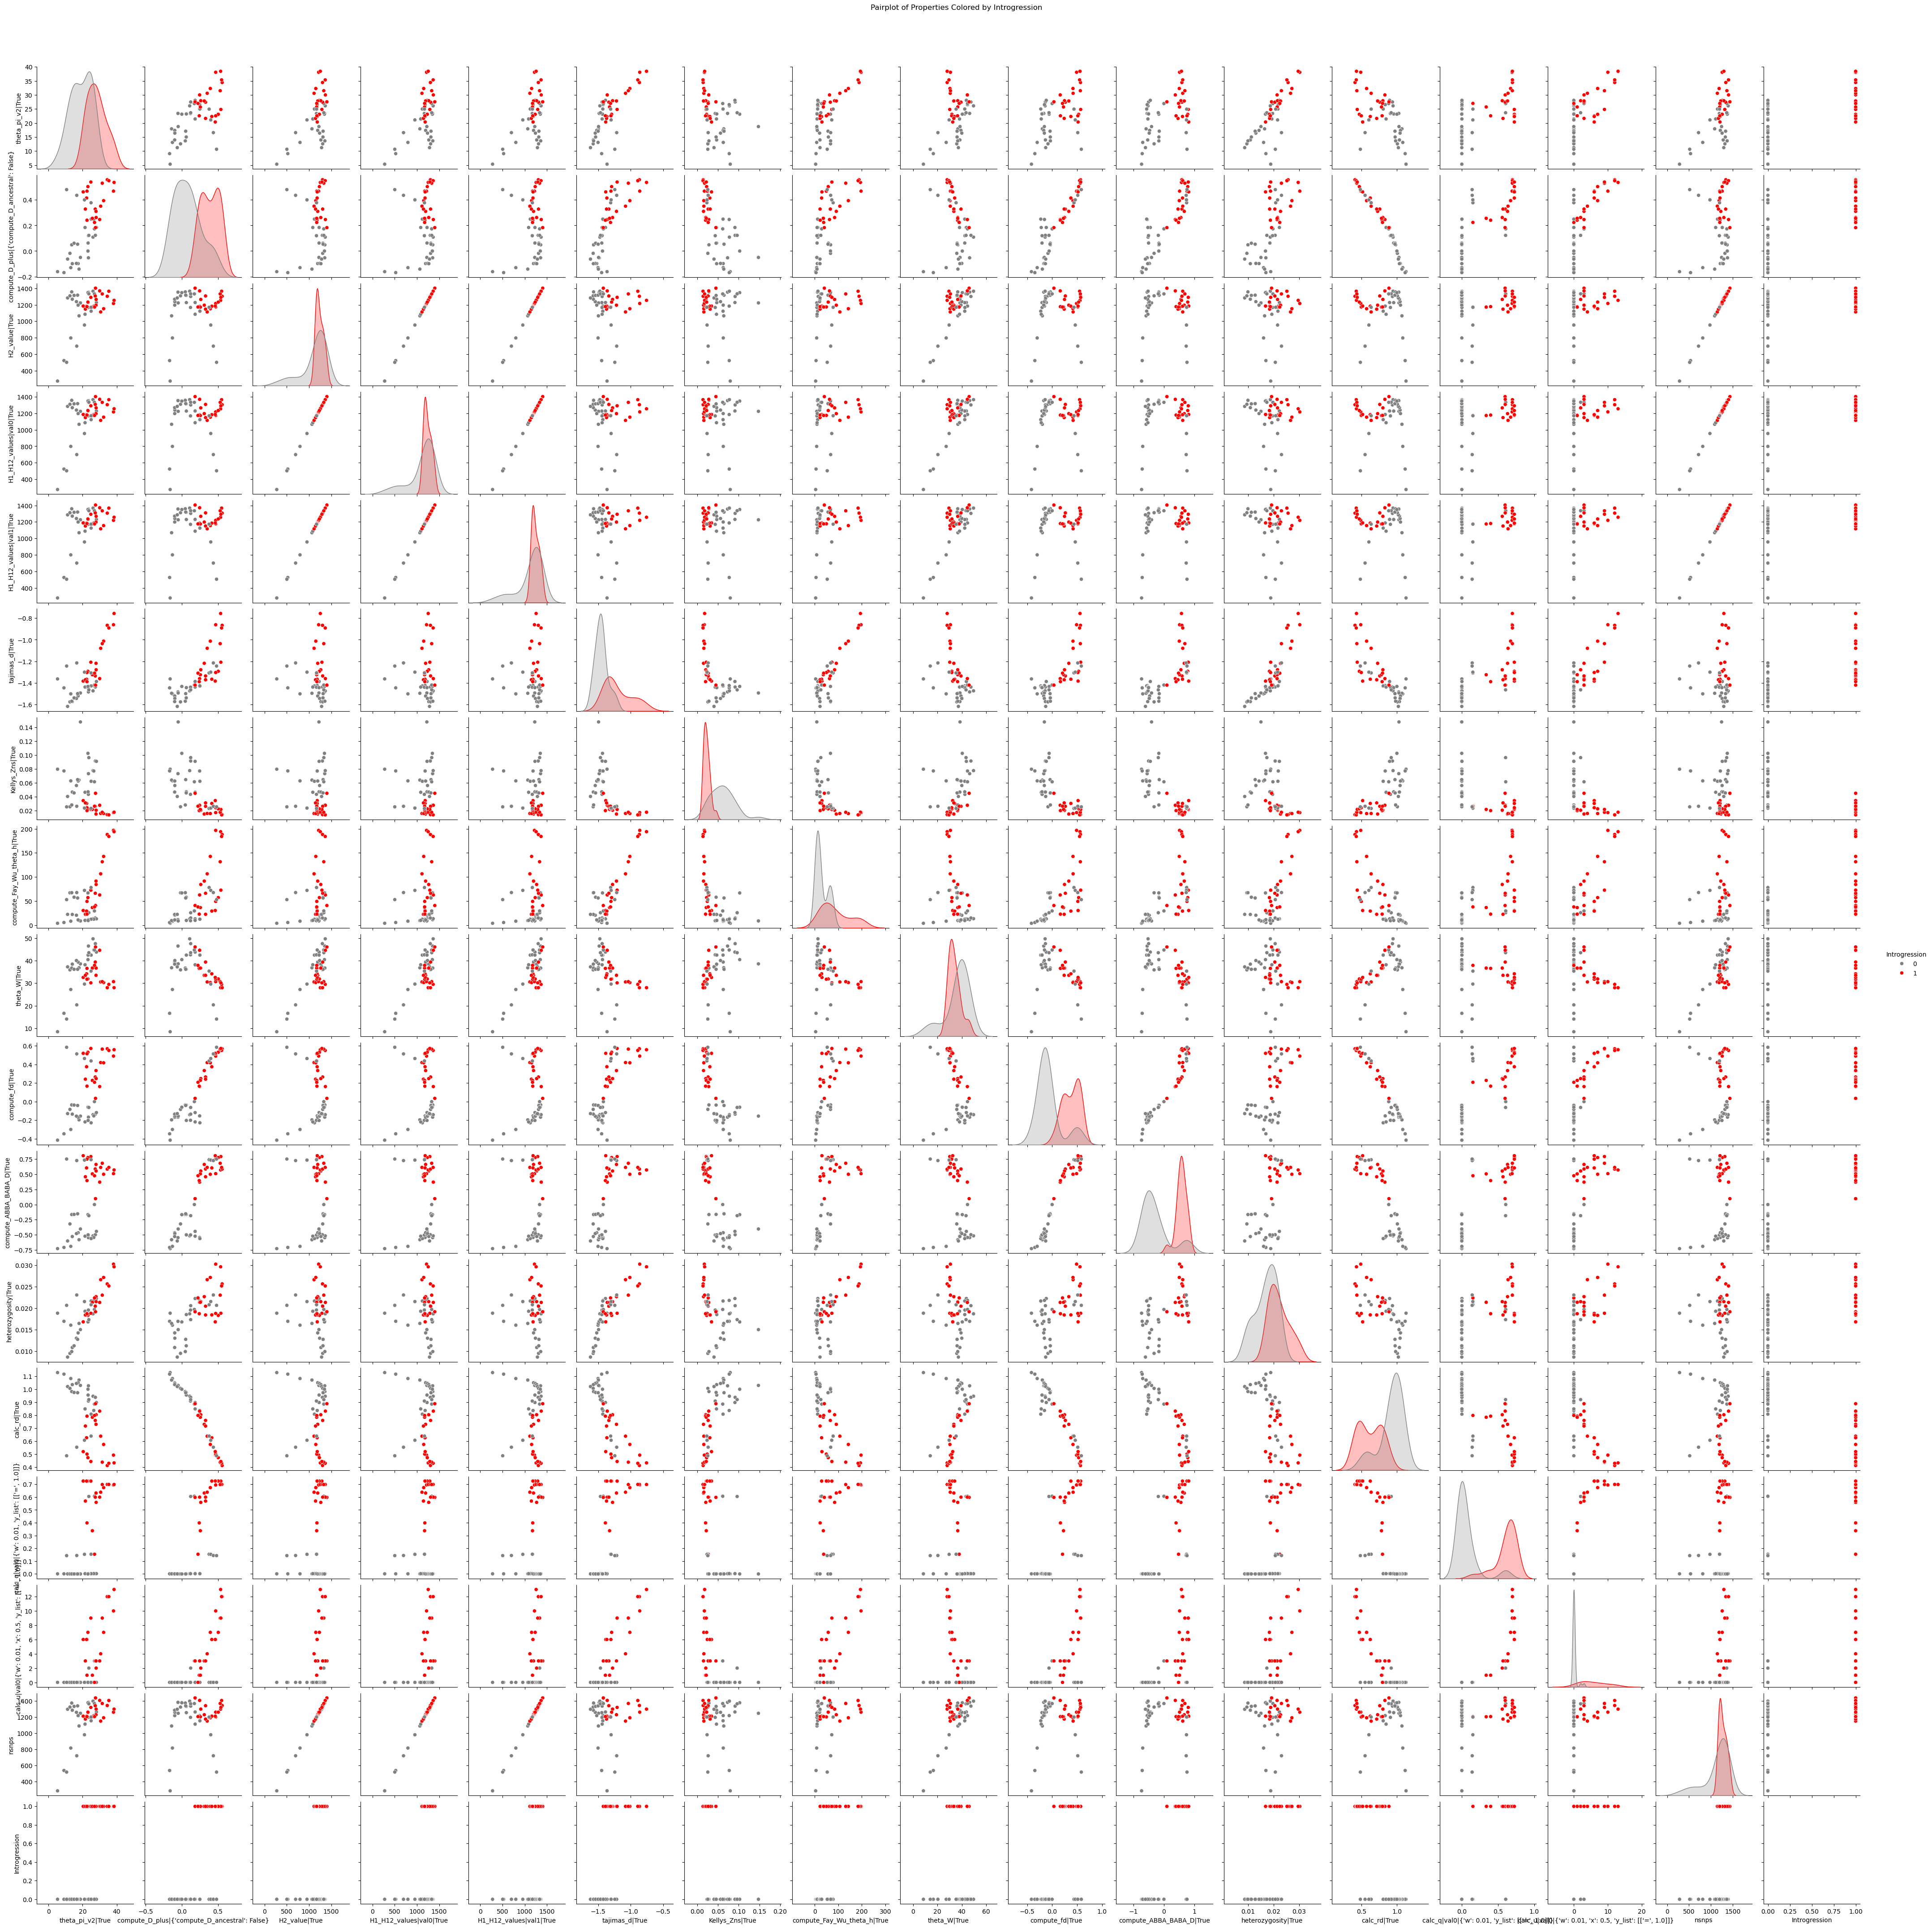

In [29]:
sns.pairplot(numeric_df.dropna(axis=1, how='all').dropna(axis=0), vars=property_columns, hue='Introgression', palette={0: 'gray', 1: 'red'}, diag_kind='kde')
plt.suptitle("Pairplot of Properties Colored by Introgression", y=1.02)
plt.show()

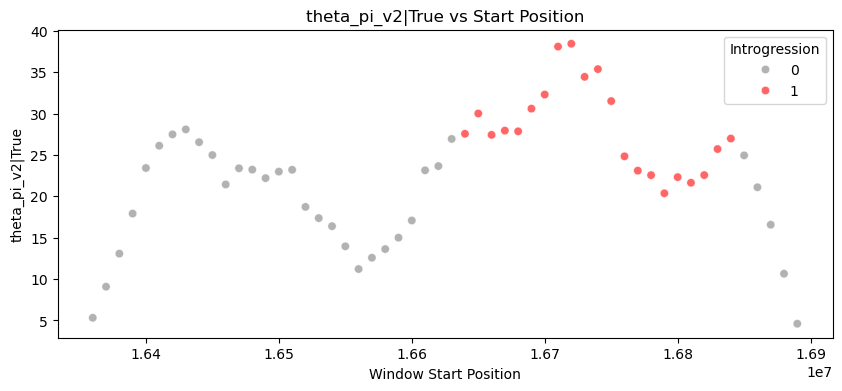

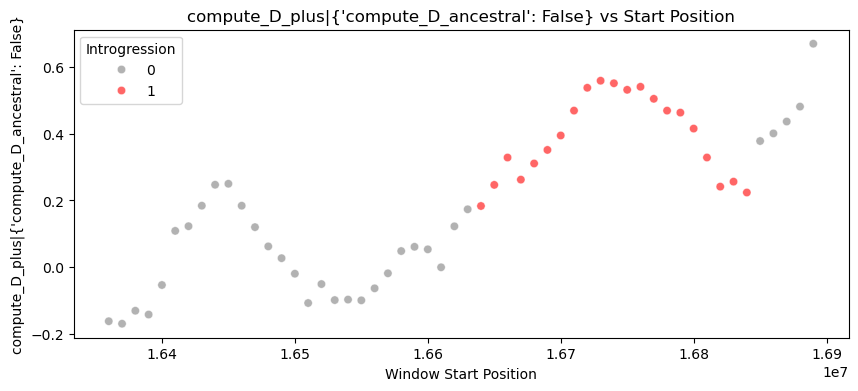

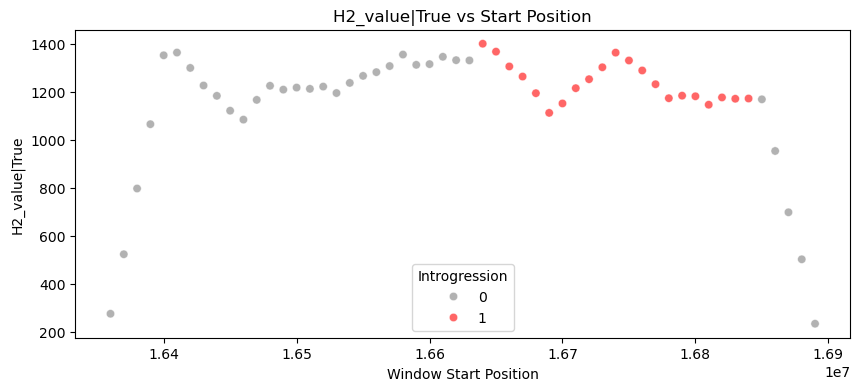

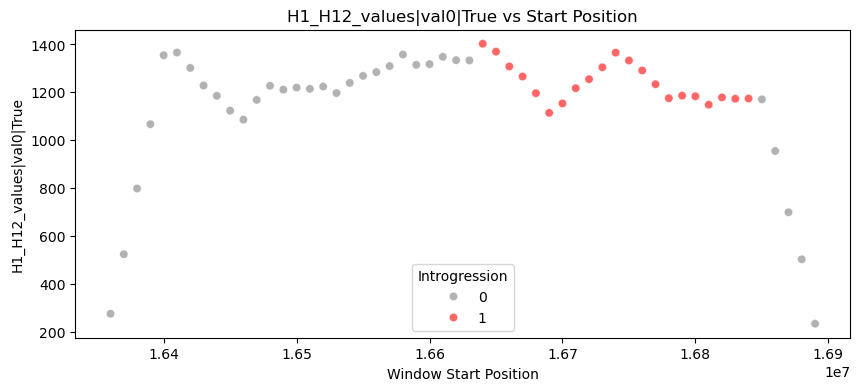

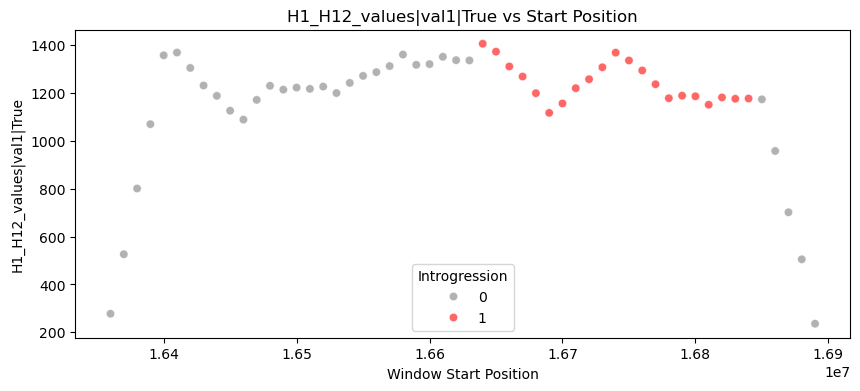

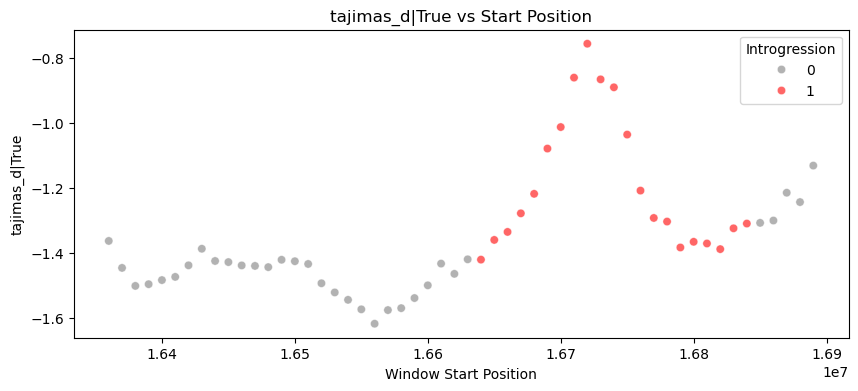

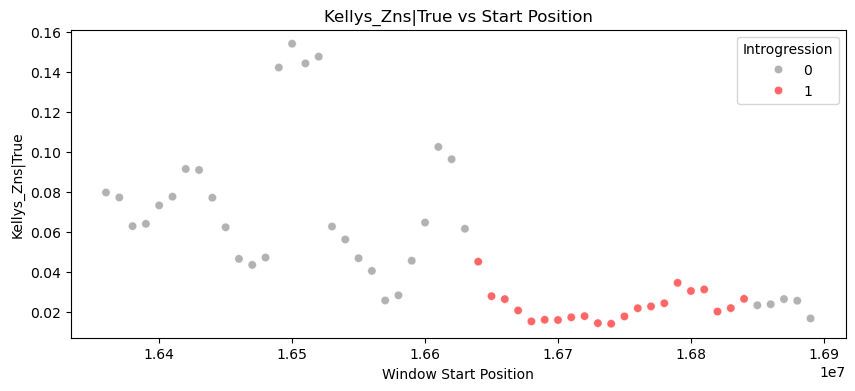

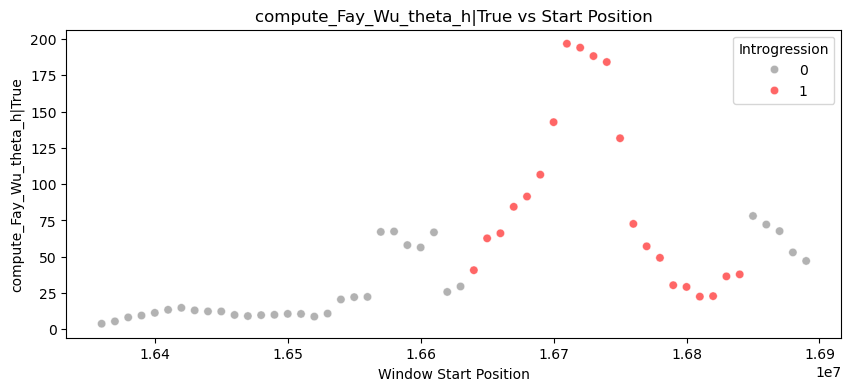

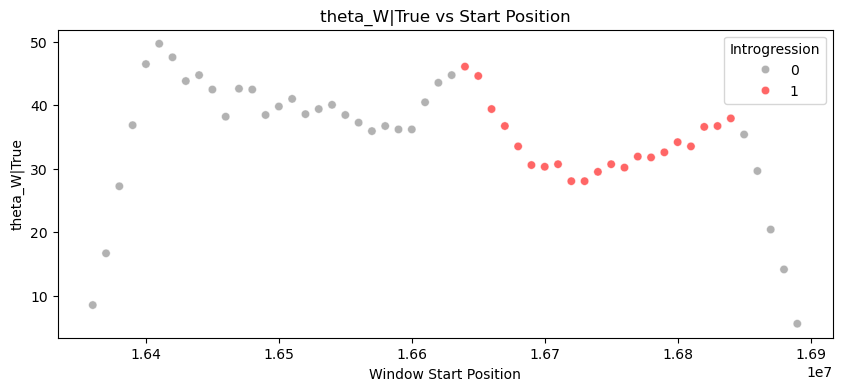

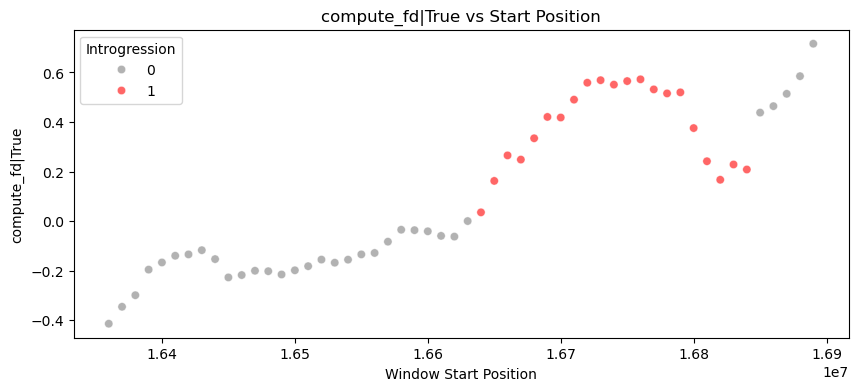

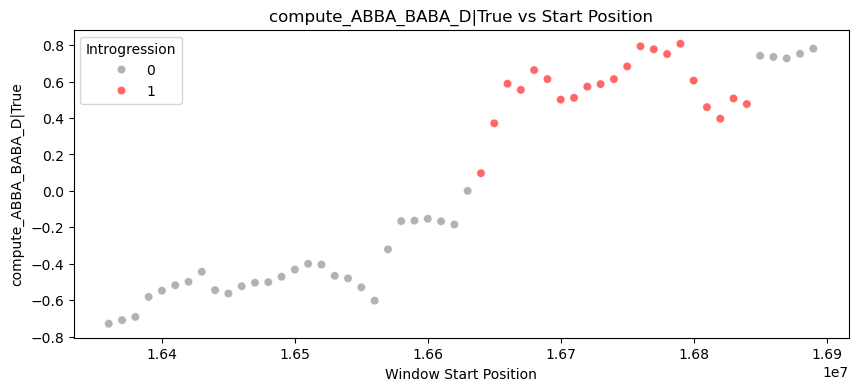

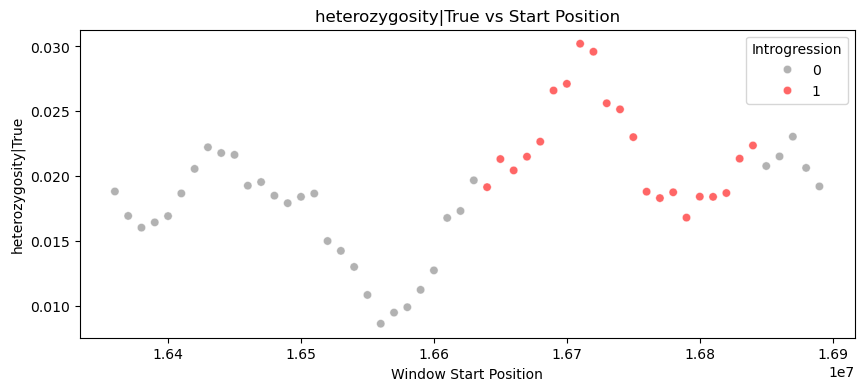

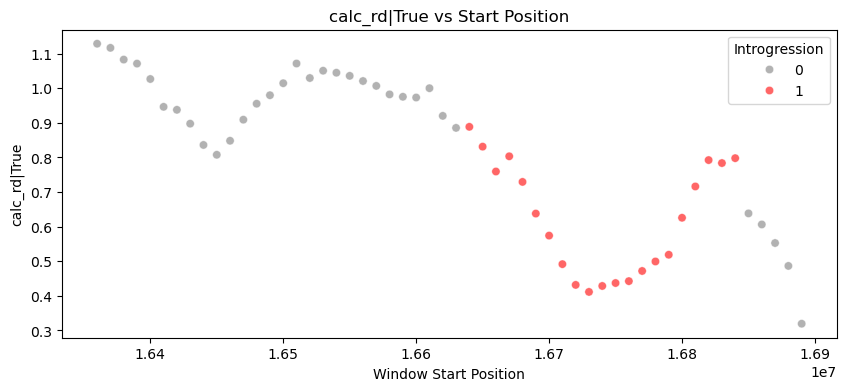

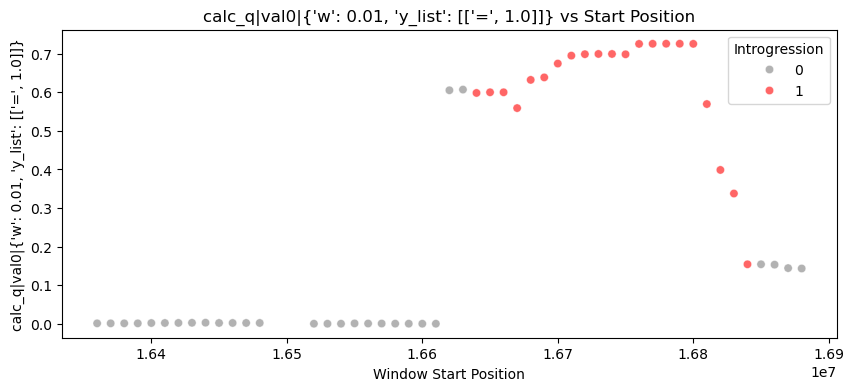

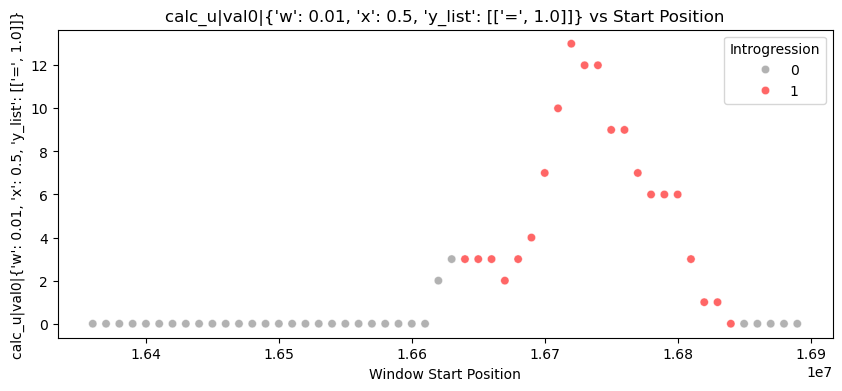

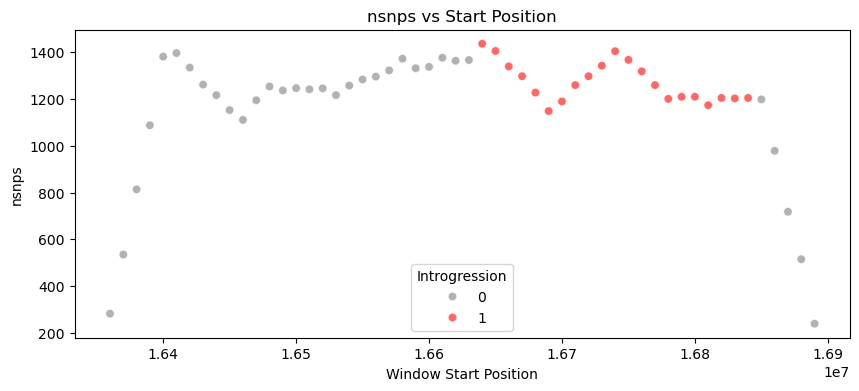

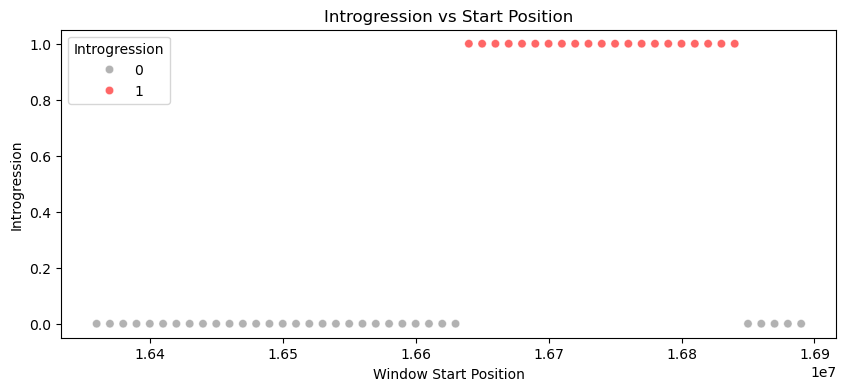

In [30]:
for prop in property_columns:
    plt.figure(figsize=(10, 4))
    sns.scatterplot(data=result_df, x='Start', y=prop, hue='Introgression', palette={0: 'gray', 1: 'red'}, alpha=0.6)
    plt.title(f"{prop} vs Start Position")
    plt.xlabel("Window Start Position")
    plt.ylabel(prop)
    plt.legend(title='Introgression')
    plt.show()


## phased results

In [31]:
result_df = result_df_phased

In [32]:
result_df["Introgression"] = 0
introgression_start = 16680001
introgression_end = 16840000
result_df.loc[(result_df['End'] >= introgression_start) & (result_df['Start'] <= introgression_end), 'Introgression'] = 1

In [33]:
result_df

Chromosome     Start       End  \
0           9  16360000  16410000   
1           9  16370000  16420000   
2           9  16380000  16430000   
3           9  16390000  16440000   
4           9  16400000  16450000   
5           9  16410000  16460000   
6           9  16420000  16470000   
7           9  16430000  16480000   
8           9  16440000  16490000   
9           9  16450000  16500000   
10          9  16460000  16510000   
11          9  16470000  16520000   
12          9  16480000  16530000   
13          9  16490000  16540000   
14          9  16500000  16550000   
15          9  16510000  16560000   
16          9  16520000  16570000   
17          9  16530000  16580000   
18          9  16540000  16590000   
19          9  16550000  16600000   
20          9  16560000  16610000   
21          9  16570000  16620000   
22          9  16580000  16630000   
23          9  16590000  16640000   
24          9  16600000  16650000   
25          9  16610000  16660000   
26          9  16620000  16670000   
27          9  16630000  16680000   
28          9  16640000  16690000   
29          9  16650000  16700000   
30          9  16660000  16710000   
31          9  16670000  16720000   
32          9  16680000  16730000   
33          9  16690000  16740000   
34          9  16700000  16750000   
35          9  16710000  16760000   
36          9  16720000  16770000   
37          9  16730000  16780000   
38          9  16740000  16790000   
39          9  16750000  16800000   
40          9  16760000  16810000   
41          9  16770000  16820000   
42          9  16780000  16830000   
43          9  16790000  16840000   
44          9  16800000  16850000   
45          9  16810000  16860000   
46          9  16820000  16870000   
47          9  16830000  16880000   
48          9  16840000  16890000   
49          9  16850000  16900000   
50          9  16860000  16910000   
51          9  16870000  16920000   
52          9  16880000  16930000   
53          9  16890000  16940000   

                                              Samples  theta_pi_v2|True  \
0   {'Ref': ['HG02461', 'HG02462', 'HG02464', 'HG0...          3.616950   
1   {'Ref': ['HG02461', 'HG02462', 'HG02464', 'HG0...          6.398744   
2   {'Ref': ['HG02461', 'HG02462', 'HG02464', 'HG0...          9.082022   
3   {'Ref': ['HG02461', 'HG02462', 'HG02464', 'HG0...         11.822274   
4   {'Ref': ['HG02461', 'HG02462', 'HG02464', 'HG0...         15.040851   
5   {'Ref': ['HG02461', 'HG02462', 'HG02464', 'HG0...         16.910356   
6   {'Ref': ['HG02461', 'HG02462', 'HG02464', 'HG0...         17.436882   
7   {'Ref': ['HG02461', 'HG02462', 'HG02464', 'HG0...         17.295192   
8   {'Ref': ['HG02461', 'HG02462', 'HG02464', 'HG0...         16.348847   
9   {'Ref': ['HG02461', 'HG02462', 'HG02464', 'HG0...         15.561744   
10  {'Ref': ['HG02461', 'HG02462', 'HG02464', 'HG0...         13.184122   
11  {'Ref': ['HG02461', 'HG02462', 'HG02464', 'HG0...         13.971225   
12  {'Ref': ['HG02461', 'HG02462', 'HG02464', 'HG0...         14.047309   
13  {'Ref': ['HG02461', 'HG02462', 'HG02464', 'HG0...         13.591909   
14  {'Ref': ['HG02461', 'HG02462', 'HG02464', 'HG0...         14.148201   
15  {'Ref': ['HG02461', 'HG02462', 'HG02464', 'HG0...         14.245910   
16  {'Ref': ['HG02461', 'HG02462', 'HG02464', 'HG0...         11.545729   
17  {'Ref': ['HG02461', 'HG02462', 'HG02464', 'HG0...         11.386189   
18  {'Ref': ['HG02461', 'HG02462', 'HG02464', 'HG0...         13.828640   
19  {'Ref': ['HG02461', 'HG02462', 'HG02464', 'HG0...         13.010174   
20  {'Ref': ['HG02461', 'HG02462', 'HG02464', 'HG0...         11.678641   
21  {'Ref': ['HG02461', 'HG02462', 'HG02464', 'HG0...         23.550381   
22  {'Ref': ['HG02461', 'HG02462', 'HG02464', 'HG0...         24.142145   
23  {'Ref': ['HG02461', 'HG02462', 'HG02464', 'HG0...         22.487676   
24  {'Ref': ['HG02461', 'HG02462', 'HG02464', 'HG0...         23.118264   
25  {'Ref': ['HG0

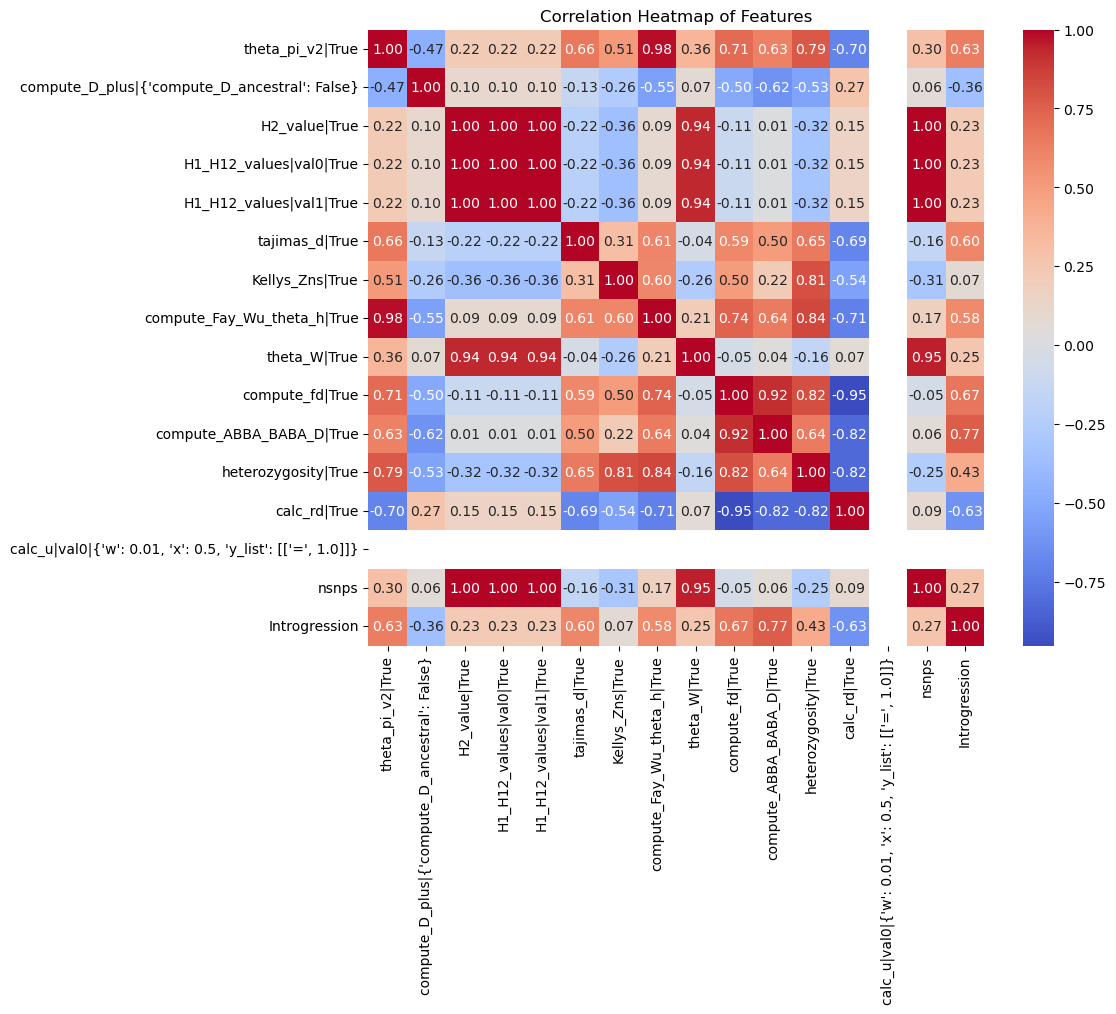

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt


filtered_df = result_df.drop(columns=[
    'Chromosome', 'Start', 'End', #'Introgression',
    'Samples', 'tgt_gts_shape', 'ref_gts_shape',
    'src_gts_shape', 'file'
])


numeric_df = filtered_df.apply(pd.to_numeric, errors='coerce')
property_columns = numeric_df.dropna(axis=1, how='all').columns

# correlation matrix
plt.figure(figsize=(10, 8))
#corr_matrix = result_df[property_columns].corr(method="spearman")
corr_matrix = result_df[property_columns].corr()

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title("Correlation Heatmap of Features")
plt.show()

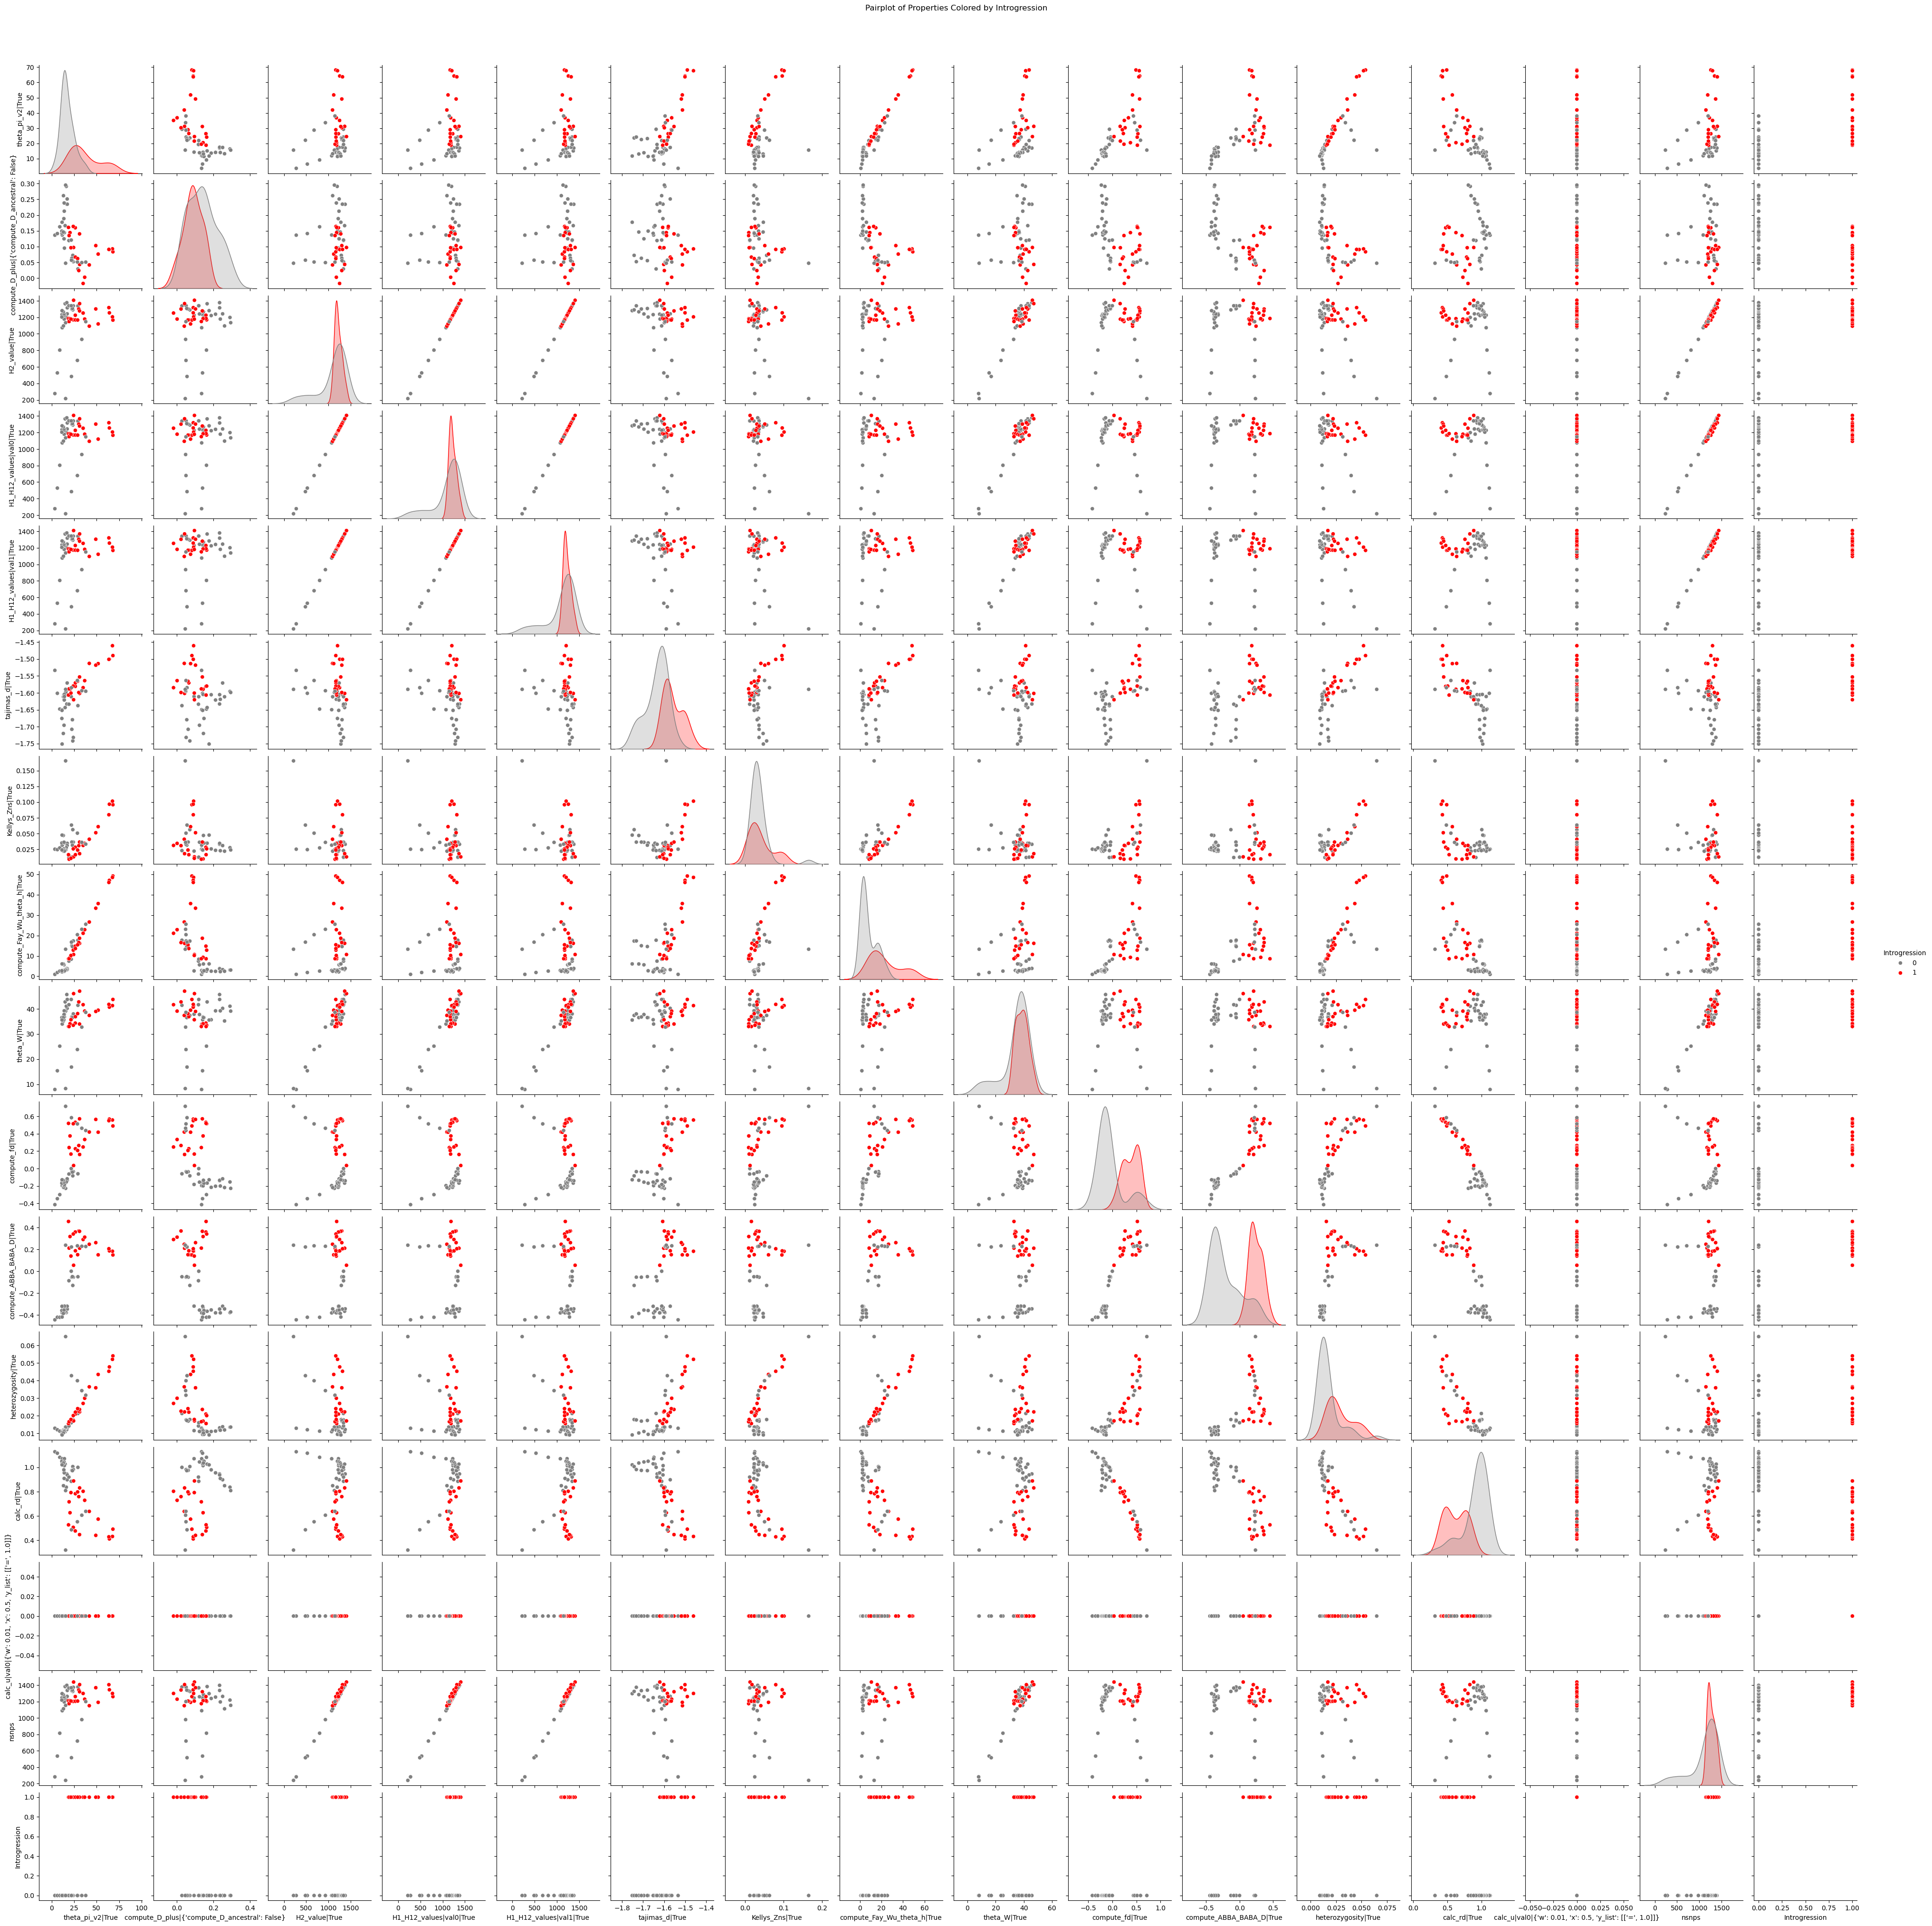

In [35]:
sns.pairplot(numeric_df.dropna(axis=1, how='all').dropna(axis=0), vars=property_columns, hue='Introgression', palette={0: 'gray', 1: 'red'}, diag_kind='kde')
plt.suptitle("Pairplot of Properties Colored by Introgression", y=1.02)
plt.show()

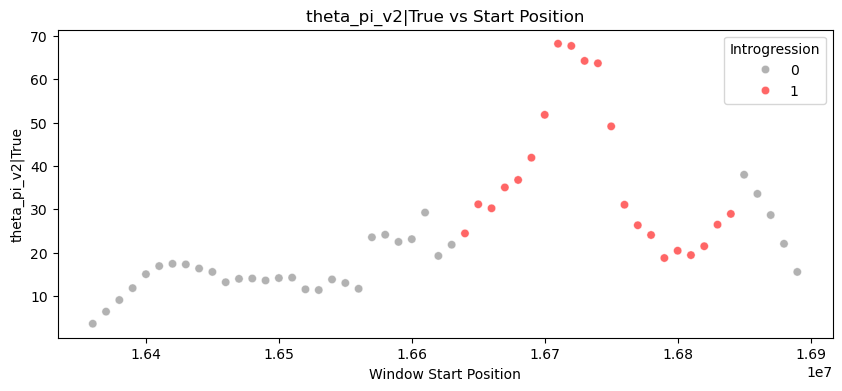

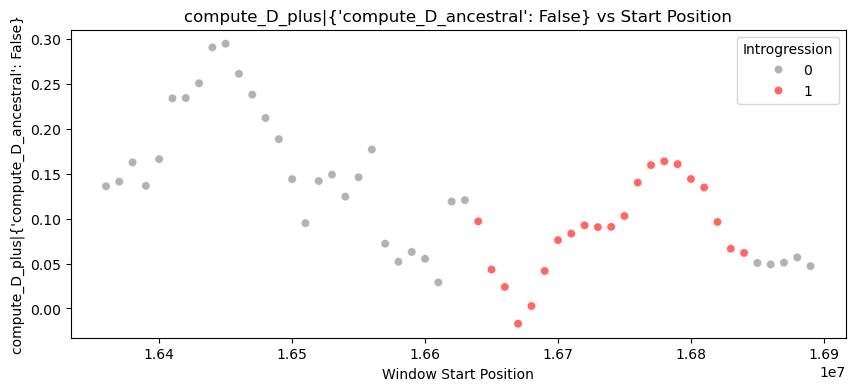

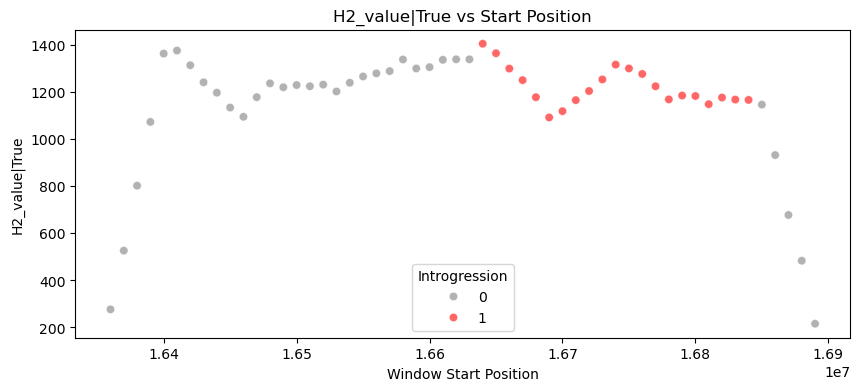

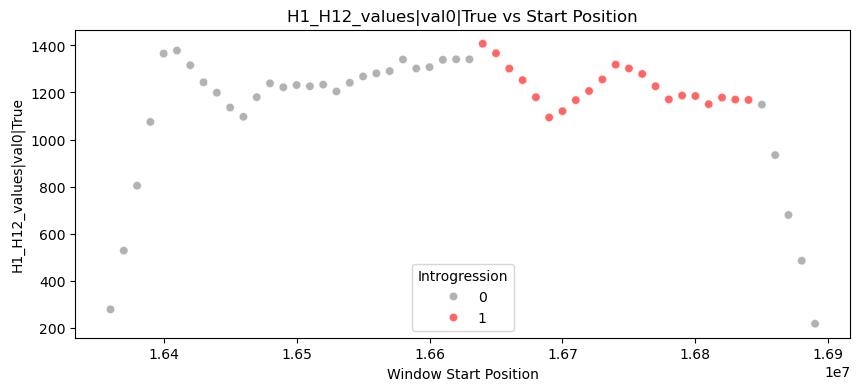

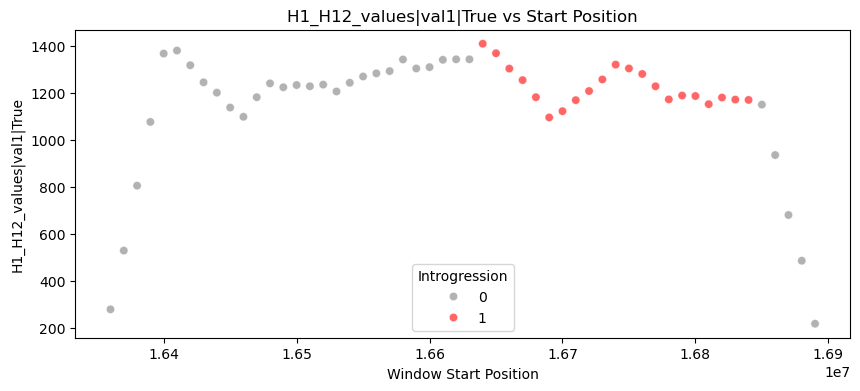

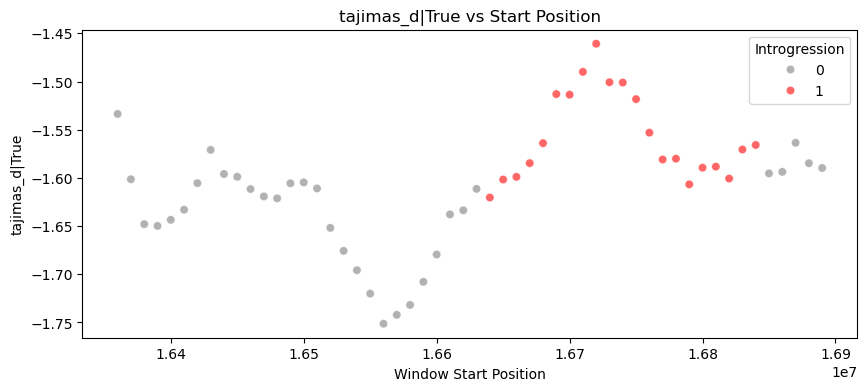

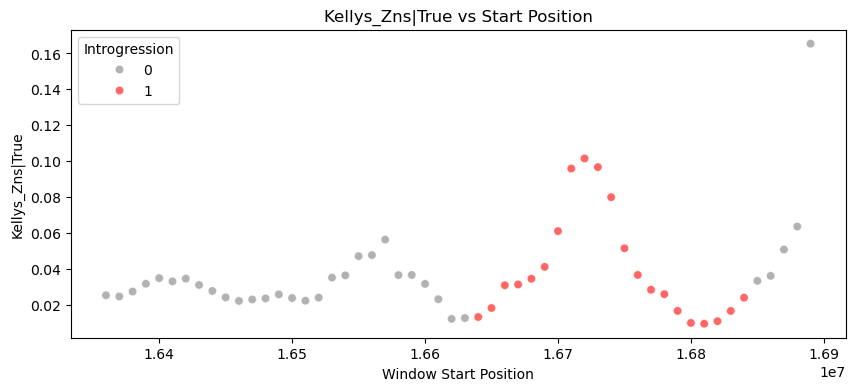

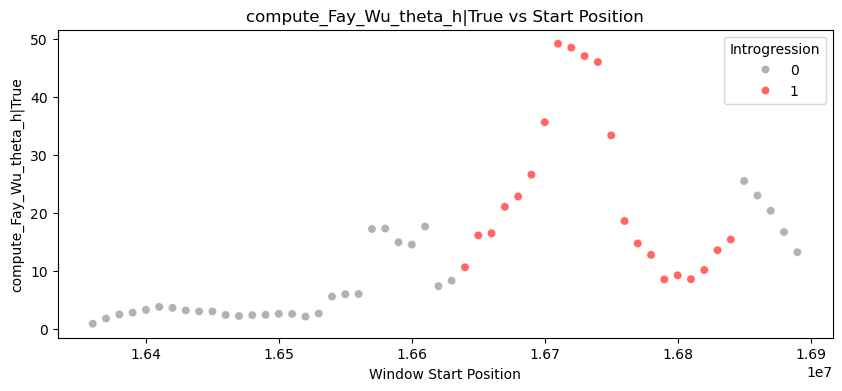

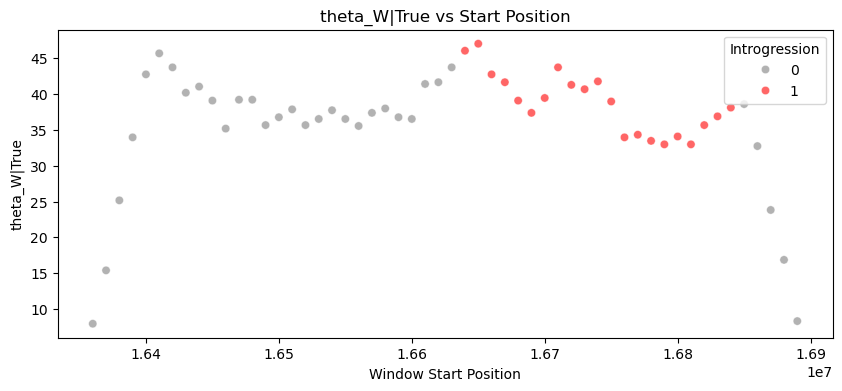

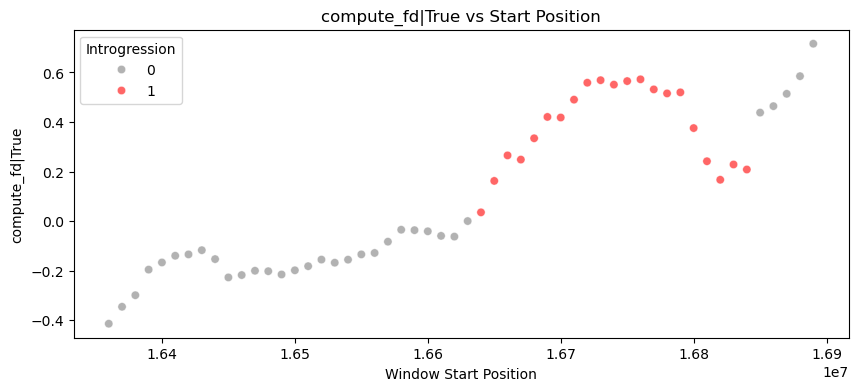

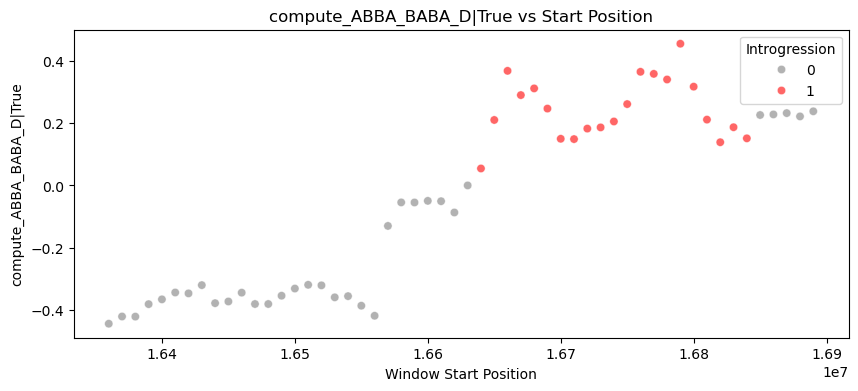

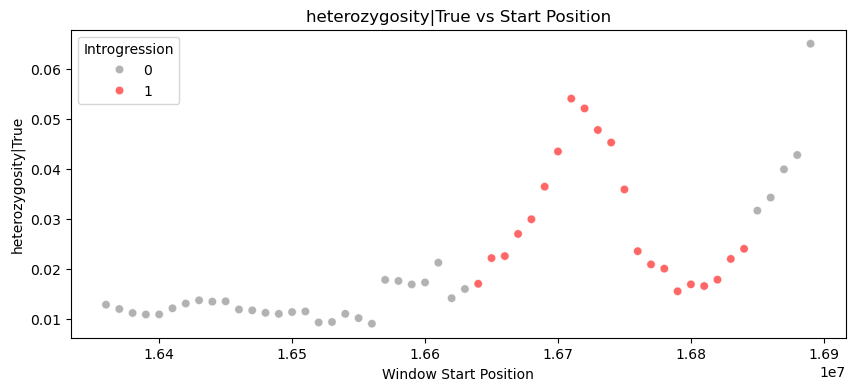

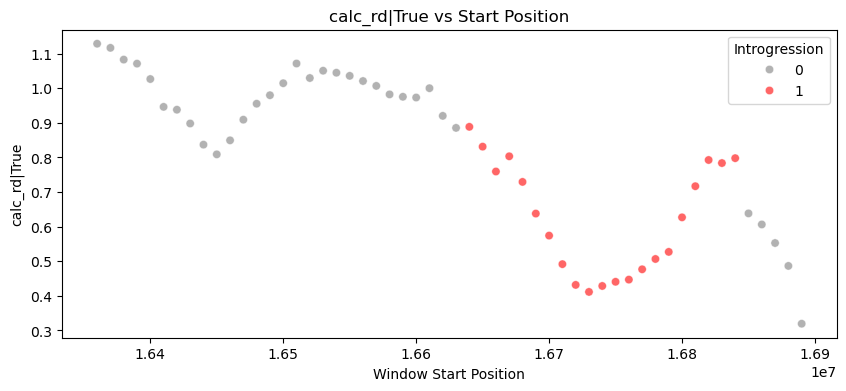

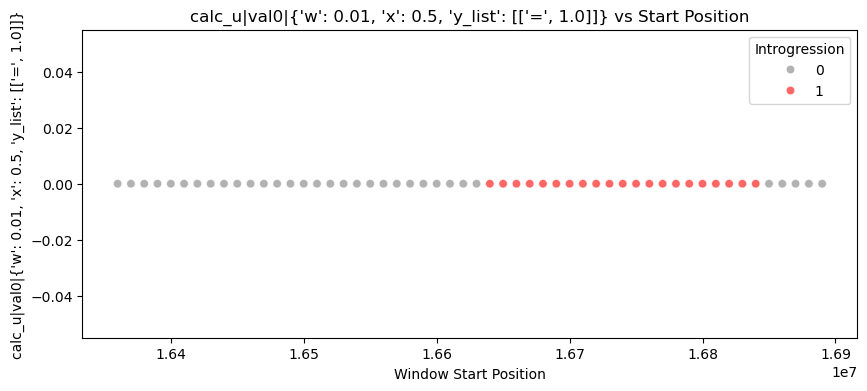

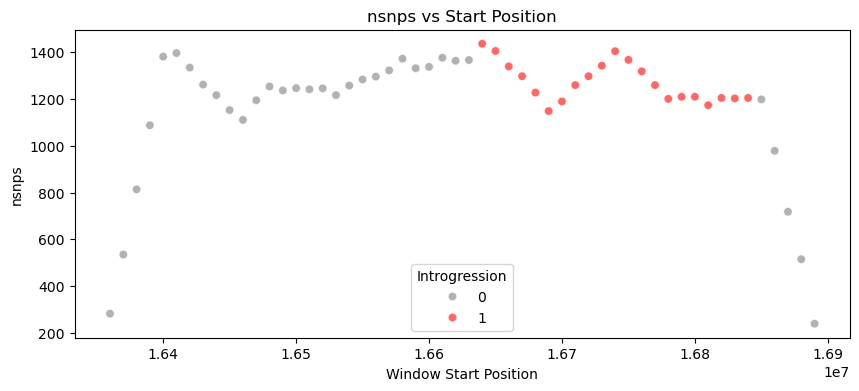

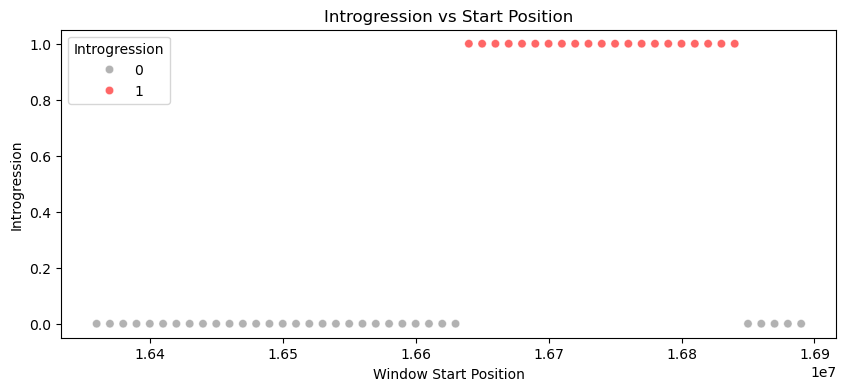

In [36]:
for prop in property_columns:
    plt.figure(figsize=(10, 4))
    sns.scatterplot(data=result_df, x='Start', y=prop, hue='Introgression', palette={0: 'gray', 1: 'red'}, alpha=0.6)
    plt.title(f"{prop} vs Start Position")
    plt.xlabel("Window Start Position")
    plt.ylabel(prop)
    plt.legend(title='Introgression')
    plt.show()
